In [8]:
import numpy as np
import tensorflow_datasets as tfds

In [2]:
ds_train, info = tfds.load('mnist', split = 'train', as_supervised = True, with_info = True)

In [3]:
info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

In [4]:
for feature, label in ds_train.take(1):
    print(feature.shape, label.numpy())
    print(feature.numpy().reshape(28, 28))

(28, 28, 1) 4
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84
  254 101   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 174
  253 119   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  31 247
  202  29   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1   0 

In [5]:
def transform(f, l):
    return f/255, l

In [6]:
ds_train = ds_train.map(transform)

Text(0.5, 1.0, 'Classe: 4')

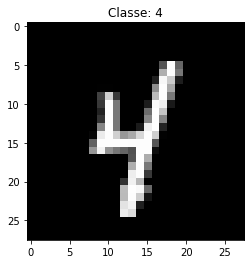

In [7]:
import matplotlib.pyplot as plt
plt.imshow(feature.numpy().reshape(28, 28), cmap = 'gray')
plt.title('Classe: ' + str(label.numpy()))

In [8]:
import tensorflow as tf
tf.random.set_seed(42)

tf.__version__

'2.3.0'

In [ ]:
def make_model():
    return tf.keras.Sequential([
                                tf.keras.layers.Conv2D(filters = 32, kernel_size = 5, strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
                                tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
                                tf.keras.layers.Conv2D(filters = 64, kernel_size = 5, strides = (1, 1), padding = 'same'),
                                tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(units = 1024, activation = 'relu'),
                                tf.keras.layers.Dropout(rate = 0.2),
                                tf.keras.layers.Dense(10)
    ])

In [ ]:
model = make_model()

dataset = ds_train.shuffle(1000).batch(128)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
model.compile(optimizer = "Adam", loss = loss, metrics = "accuracy")
model.fit(dataset, epochs = 1)

469/469 [==============================] - 172s 366ms/step - loss: 0.1322 - accuracy: 0.9599


In [24]:
ds_test = tfds.load('mnist', split = 'test', as_supervised = True)
dataset = ds_test.map(transform).batch(128)
model.evaluate(dataset)

79/79 [==============================] - 8s 95ms/step - loss: 0.0433 - accuracy: 0.9860


[0.04329773783683777, 0.9860000014305115]

In [ ]:
preds = model.predict(dataset)
preds = np.argmax(preds, axis = 1)
preds[:10]

array([2, 0, 4, 8, 7, 6, 0, 6, 3, 1])

In [26]:
image_test, label_test = next(iter(ds_test.take(1)))

Text(0.5, 1.0, 'Classe prevista: 2')

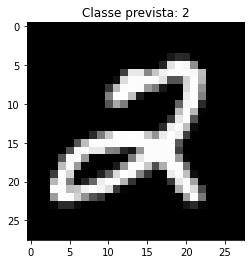

In [27]:
plt.imshow(image_test.numpy().reshape(28, 28), cmap = 'gray')
plt.title('Classe prevista: ' + str(preds[0]))